# Notebook de análise de dados dos docentes

## Imports e funções

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
sns.set_style('whitegrid')

In [375]:
df_docente = pd.read_csv('../Data/docentes_2015-2019.csv')
df_docente.head()

,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,...,IN_ATUACAO_GRAD_PRESENCIAL,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO
0,2015,547,2,1,846997,D42869F50580863B11508C9BC447716E,1,4,2.0,2,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
1,2015,3163,1,4,781183,5F67105770DC09D3CFD410D25569586A,1,5,1.0,1,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
2,2015,163,4,1,838916,39B567434A2F3422F28E816E5BB65CDD,1,3,2.0,2,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
3,2015,3163,1,4,688412,39B567434A2F3422F28E816E5BB65CDD,1,3,2.0,2,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN
4,2015,3163,1,4,688583,B331397C4A4FD54AA82A4F4B258C8407,1,4,1.0,1,...,1.0,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN


In [376]:
df_uni = pd.read_csv('../Data/universidades_ti.csv')
df_uni.head()

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,CO_MANTENEDORA,NO_MANTENEDORA,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF,...,VL_RECEITA_PROPRIA,VL_RECEITA_TRANSFERENCIA,VL_RECEITA_OUTRA,VL_DESPESA_PESSOAL_DOCENTE,VL_DESPESA_PESSOAL_TECNICO,VL_DESPESA_PESSOAL_ENCARGO,VL_DESPESA_CUSTEIO,VL_DESPESA_INVESTIMENTO,VL_DESPESA_PESQUISA,VL_DESPESA_OUTRA
0,2015,838,FACULDADE DE CIÊNCIAS TECNOLÓGICAS DE FORTALEZA,FCTFOR,580,ASSOCIACAO DE ENSINO SUPERIOR DE FORTALEZA-AESF,5,3,2,23,...,169740.78,0.0,36506.47,2.116794e+05,3.338444e+04,1056.89,58335.65,6872.3,0.0,0.0
1,2015,4043,FACULDADE TECNOLOGIA EDUVALE - AVARÉ,FATEC EDUVALE,882,ASSOCIACAO EDUCACIONAL DO VALE DA JURUMIRIM,5,3,3,35,...,702467.00,0.0,0.00,2.388390e+05,8.429600e+04,70246.00,38635.00,147518.0,80784.0,26693.0
2,2015,1330,FACULDADE COTEMIG,COTEMIG,889,SOCIEDADE TECNICA EDUCACIONAL DE MINAS GERAIS ...,4,3,3,31,...,2010702.00,0.0,109276.00,5.487750e+05,2.017330e+05,568609.00,699185.00,7018.0,0.0,94658.0
3,2015,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.00,0.0,0.0,0.0
4,2015,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.00,0.0,0.0,0.0


In [297]:
df_uni.loc[df_uni.CO_IES.isin([5016,5017])]

,NU_ANO_CENSO,CO_IES,NO_IES,SG_IES,CO_MANTENEDORA,NO_MANTENEDORA,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_REGIAO,CO_UF,...,VL_RECEITA_PROPRIA,VL_RECEITA_TRANSFERENCIA,VL_RECEITA_OUTRA,VL_DESPESA_PESSOAL_DOCENTE,VL_DESPESA_PESSOAL_TECNICO,VL_DESPESA_PESSOAL_ENCARGO,VL_DESPESA_CUSTEIO,VL_DESPESA_INVESTIMENTO,VL_DESPESA_PESQUISA,VL_DESPESA_OUTRA
3,2015,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.00,0.00,0.00
4,2015,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.00,0.00,0.00
14,2016,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.00,0.00,0.00
15,2016,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,686089515.0,0.00,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.00,0.00,0.00
25,2017,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.01,686089515.0,0.01,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.01,0.01,0.01
26,2017,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.01,686089515.0,0.01,3.519529e+08,2.956405e+08,77429647.55,69300103.0,0.01,0.01,0.01
36,2018,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,768654871.0,0.00,3.658368e+08,2.353404e+08,71197489.35,27685453.0,10464530.00,9494530.00,48635739.00
37,2018,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,768654871.0,0.00,3.658368e+08,2.353404e+08,71197489.35,27685453.0,10464530.00,9494530.00,48635739.00
47,2019,5017,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ PETRÓPOLIS,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,768654871.0,0.00,3.658368e+08,2.353404e+08,71197489.35,27685453.0,10464530.00,9494530.00,48635739.00
48,2019,5016,FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO...,FAETERJ R DE JANEIRO,904,FUNDACAO DE APOIO A ESCOLA TECNICA DO EST.RIO ...,2,3,3,33,...,0.00,768654871.0,0.00,3.658368e+08,2.353404e+08,71197489.35,27685453.0,10464530.00,9494530.00,48635739.00


In [377]:
df_uni.groupby(['CO_IES', 'SG_IES'])['CO_IES'].count().index.to_list()
mapa_unis = {
 838: 'FCTFOR', #'FACULDADE DE CIÊNCIAS TECNOLÓGICAS DE FORTALEZA'
 1330: 'COTEMIG', #'FACULDADE COTEMIG'
 3299: 'FATI', #'FACULDADE DE TECNOLOGIA INFORMÁTICA'
 3657: 'FACOMP', #'FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS'
 4043: 'FATEC\n EDUVALE', #'FACULDADE TECNOLOGIA EDUVALE - AVARÉ'
 4173: 'FACJK', #'FACULDADE JK DE TECNOLOGIA'
 4199: 'ROGA', #'FACULDADE DE TECNOLOGIA ROGACIONISTA'
 5016: 'FAETERJ\nR DE JANEIRO', # 'FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ'
 5017: 'FAETERJ\n PETRÓPOLIS', # 'FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ' 
 10323: 'BANDTEC', #'FACULDADE DE TECNOLOGIA BANDEIRANTES'
 15236: 'AMTEC', #'FACULDADE DE TECNOLOGIA ALCIDES MAYA'
 4199: 'FAJKEMASII' #'FACULDADE DE TECNOLOGIA ALCIDES MAYA'
 }
df_docente['NO_IES'] = df_docente['CO_IES'].map(mapa_unis)

# FACULDADE DE CIÊNCIAS TECNOLÓGICAS DE FORTALEZA, FACULDADE TECNOLOGIA EDUVALE - AVARÉ, 
# FACULDADE COTEMIG, FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ,
# FACULDADE DE TECNOLOGIA INFORMÁTICA, FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS,
# FACULDADE DE TECNOLOGIA ROGACIONISTA, FACULDADE DE TECNOLOGIA BANDEIRANTES, 
# FACULDADE JK DE TECNOLOGIA, FACULDADE DE TECNOLOGIA ALCIDES MAYA, 
# Faculdade JK Brasília - Recanto das Emas II

In [378]:
df_uni[['SG_IES', 'CO_IES', 'NO_IES']].values

array([['FCTFOR', 838, 'FACULDADE DE CIÊNCIAS TECNOLÓGICAS DE FORTALEZA'],
       ['FATEC EDUVALE', 4043, 'FACULDADE TECNOLOGIA EDUVALE - AVARÉ'],
       ['COTEMIG', 1330, 'FACULDADE COTEMIG'],
       ['FAETERJ PETRÓPOLIS', 5017,
        'FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ'],
       ['FAETERJ R DE JANEIRO', 5016,
        'FACULDADE DE EDUCAÇÃO TECNOLÓGICA DO ESTADO DO RIO DE JANEIRO - FAETERJ'],
       ['FATI', 3299, 'FACULDADE DE TECNOLOGIA INFORMÁTICA'],
       ['FACOMP', 3657, 'FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS'],
       ['ROGA', 4199, 'FACULDADE DE TECNOLOGIA ROGACIONISTA'],
       ['BANDTEC', 10323, 'FACULDADE DE TECNOLOGIA BANDEIRANTES'],
       ['FACJK', 4173, 'FACULDADE JK DE TECNOLOGIA'],
       ['AMTEC', 15236, 'FACULDADE DE TECNOLOGIA ALCIDES MAYA'],
       ['FCTFOR', 838, 'FACULDADE DE CIÊNCIAS TECNOLÓGICAS DE FORTALEZA'],
       ['FATEC EDUVALE', 4043, 'FACULDADE TECNOLOGIA EDUVALE - AVARÉ'],
       ['COTEMIG', 1330, 'FACULDADE C

In [379]:
print(len(df_uni.CO_IES.unique()))
df_uni.CO_IES.unique()

11


array([  838,  4043,  1330,  5017,  5016,  3299,  3657,  4199, 10323,
        4173, 15236])

In [380]:
df_uni.groupby(['CO_IES'])[['NU_ANO_CENSO','SG_IES','NO_IES']].count()

,NU_ANO_CENSO,SG_IES,NO_IES
CO_IES,,,
838,5,5,5
1330,5,5,5
3299,5,5,5
3657,5,3,5
4043,5,5,5
4173,5,5,5
4199,5,2,5
5016,5,5,5
5017,5,5,5


In [381]:
df_uni.loc[df_uni.CO_IES == 3657][['NU_ANO_CENSO','SG_IES','NO_IES']]

,NU_ANO_CENSO,SG_IES,NO_IES
6,2015,FACOMP,FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS
17,2016,FACOMP,FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS
28,2017,FACOMP,FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS
40,2018,NaN,FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS
51,2019,NaN,FACULDADE DE COMPUTAÇÃO DE MONTES CLAROS


In [382]:
df_uni.at[51, 'SG_IES'] = "FACOMP"
df_uni.at[40, 'SG_IES'] = "FACOMP"

In [383]:
df_uni.loc[df_uni.CO_IES == 4199][['NU_ANO_CENSO','SG_IES','NO_IES']]

,NU_ANO_CENSO,SG_IES,NO_IES
7,2015,ROGA,FACULDADE DE TECNOLOGIA ROGACIONISTA
18,2016,ROGA,FACULDADE DE TECNOLOGIA ROGACIONISTA
32,2017,NaN,Faculdade JK Brasília - Recanto das Emas II
43,2018,NaN,Faculdade JK Brasília - Recanto das Emas II
54,2019,NaN,Faculdade JK Brasília - Recanto das Emas II


In [384]:
df_uni.at[7, 'SG_IES'] = "FAJKEMASII"
df_uni.at[18, 'SG_IES'] = "FAJKEMASII"
df_uni.at[32, 'SG_IES'] = "FAJKEMASII"
df_uni.at[43, 'SG_IES'] = "FAJKEMASII"
df_uni.at[54, 'SG_IES'] = "FAJKEMASII"

In [385]:
# df_uni = df_uni.loc[df_uni.CO_IES != 4199]
print(len(df_uni.CO_IES.unique()))
df_uni.CO_IES.unique()

11


array([  838,  4043,  1330,  5017,  5016,  3299,  3657,  4199, 10323,
        4173, 15236])

In [386]:
replace_map = {
    'TP_SITUACAO': {2: "Cursando",
                    3: "Matrícula trancada",
                    4: "Desvinculado do curso",
                    5: "Transferido para outro \n curso da mesma IES",
                    6: "Formado",
                    7: "Falecido"},
    'TP_SEXO' : {1: "Feminino", 2: "Masculino"},
    'TP_CATEGORIA_ADMINISTRATIVA': {
                1: "Pública Federal",
                2: "Pública Estadual",
                3: "Pública Municipal",
                4: "Privada com fins lucrativos",
                5: "Privada sem fins lucrativos",
                6: "Privada - Particular em sentido estrito",
                7: "Especial",
                8: "Privada comunitária",
                9: "Privada confessional"
              },
  'TP_ESCOLARIDADE': {
              1: "Sem graduação",
              2: "Graduação",
              3: "Especialização",
              4: "Mestrado",
              5: "Doutorado"                 
            }  
}

In [387]:
colors = [(0.62, 0.0, 0.26), (0.89, 0.32, 0.29), (0.99, 0.65, 0.36), (1, 0.90, 0.44), (0.59, 0.73, 0.38), (0.64, 0.85, 0.64), (0.28, 0.63, 0.70), (0.37, 0.31, 0.64)]
cm = LinearSegmentedColormap.from_list('Spectral', colors)

def bar_plot_lines_porcentagem(dataframe, param1, param2, param3, param4, colormap=""):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)
  data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
  totais = []
  for c in data_modified.columns:
    totais.append(data.groupby(param2)[param1].value_counts().unstack(0)[c].sum())
  for i in range(len(data_modified.columns)):
    data_modified[data_modified.columns[i]] = 100*(data_modified[data_modified.columns[i]] / sum(totais))
    # data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
  print(data_modified)
  if colormap != "":
    # colormap = plt.cm.nipy_spectral
# colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
    data_modified \
      .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
  else:
    data_modified \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
  plt.ylabel(param3, fontsize = 20)
  plt.xlabel(param4, fontsize = 20)

  xposition = [0.5 + i for i in range(len(df[param1].unique()))]
  for xc in xposition:
      plt.axvline(x=xc, color='gray', linestyle=':')
        
def bar_plot_lines(dataframe, param1, param2, param3, param4, colormap="", porcentagens = True):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)
  if colormap != "":
    # colormap = plt.cm.nipy_spectral
    # colors = [colormap(i) for i in np.linspace(0, 1, len(df[param2].unique()))]
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), colormap=colormap, fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
  else:
    data.replace(replace_map).groupby(param2)[param1].value_counts().sort_values().unstack(0) \
        .plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
        .legend(prop={'size': 20})
        
  plt.ylabel(param3, fontsize = 20)
  plt.xlabel(param4, fontsize = 20)

  xposition = [0.5 + i for i in range(len(df[param1].unique()))]
  for xc in xposition:
      plt.axvline(x=xc, color='gray', linestyle=':')
    
def bar_plot_lines_stacked_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30), sort_params=['Feminino', 'Masculino']):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0).sort_values(by=sort_params).plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", stacked=True, xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]).legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]


def bar_plot_lines_horizontal(dataframe, param1, param2, param3, param4, color_array=cm, colormap="", tick_amout=100, figure_size=(20, 30)):
  df = dataframe[[param1, param2]]

  data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
  data = data.replace(replace_map)

  data.groupby(param2)[param1].value_counts().unstack(0)\
    .plot.barh(rot=0, figsize=figure_size, fontsize=16, width=0.9, linestyle="--", xticks=[(i*1000) for i in range((tick_amout//1000) + 1)]) \
    .legend(prop={'size': 12})
  plt.ylabel(param3, fontsize = 16)
  plt.xlabel(param4, fontsize = 16)
  xposition = [10 + (i)*10 for i in range(tick_amout//10)]

## Limpeza da base

In [388]:
cod_ies_ti = df_uni.CO_IES.unique()
print(cod_ies_ti)
# selecionando apenas docentes das universidades de TI
df_docente.loc[df_docente.CO_IES.isin(cod_ies_ti)]

[  838  4043  1330  5017  5016  3299  3657  4199 10323  4173 15236]


,NU_ANO_CENSO,CO_IES,TP_CATEGORIA_ADMINISTRATIVA,TP_ORGANIZACAO_ACADEMICA,CO_DOCENTE_IES,ID_DOCENTE,TP_SITUACAO,TP_ESCOLARIDADE,TP_REGIME_TRABALHO,TP_SEXO,...,IN_ATUACAO_POS_EAD,IN_ATUACAO_POS_PRESENCIAL,IN_ATUACAO_SEQUENCIAL,IN_ATUACAO_PESQUISA,IN_BOLSA_PESQUISA,IN_SUBSTITUTO,IN_EXERCICIO_DATA_REFERENCIA,IN_VISITANTE,TP_VISITANTE_IFES_VINCULO,NO_IES
5746,2015,10323,4,3,875876,A0BC2DD82CDC174E4779DED86ED7ACB7,1,3,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,BANDTEC
10422,2015,838,5,3,210430,8F77251C3BCD09A418F9913C0563D853,1,5,4.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,FCTFOR
11777,2015,15236,4,3,348775,532CCE622CCC952253F64A04C932727B,1,3,3.0,1,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
11780,2015,15236,4,3,348777,8BC9813BD252C2ED02BA83A14987605D,1,3,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
11784,2015,15236,4,3,348776,7EC790656E1811CF5C374BF4E12603CC,1,3,4.0,1,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970727,2019,15236,4,3,1418117,F07988BAE95B71481C0FF1DEE4D41B6A,1,4,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,AMTEC
1970728,2019,15236,4,3,153250,2072C5A2646F18C1836DBCAFB317E3DD,1,4,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
1970729,2019,15236,4,3,107409,3497C16DC972D1E3237E7C7D2A0A2AB8,1,4,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC
1970730,2019,15236,4,3,1227390,DE364D983C967368B39F432044473AC2,1,4,4.0,2,...,0.0,0.0,0.0,0.0,NaN,0.0,1.0,0.0,NaN,AMTEC


In [389]:
df_docente = df_docente.loc[df_docente.CO_IES.isin(cod_ies_ti)]

In [390]:
df_docente.to_csv('docente_limpo.csv', index=False)

## Análises

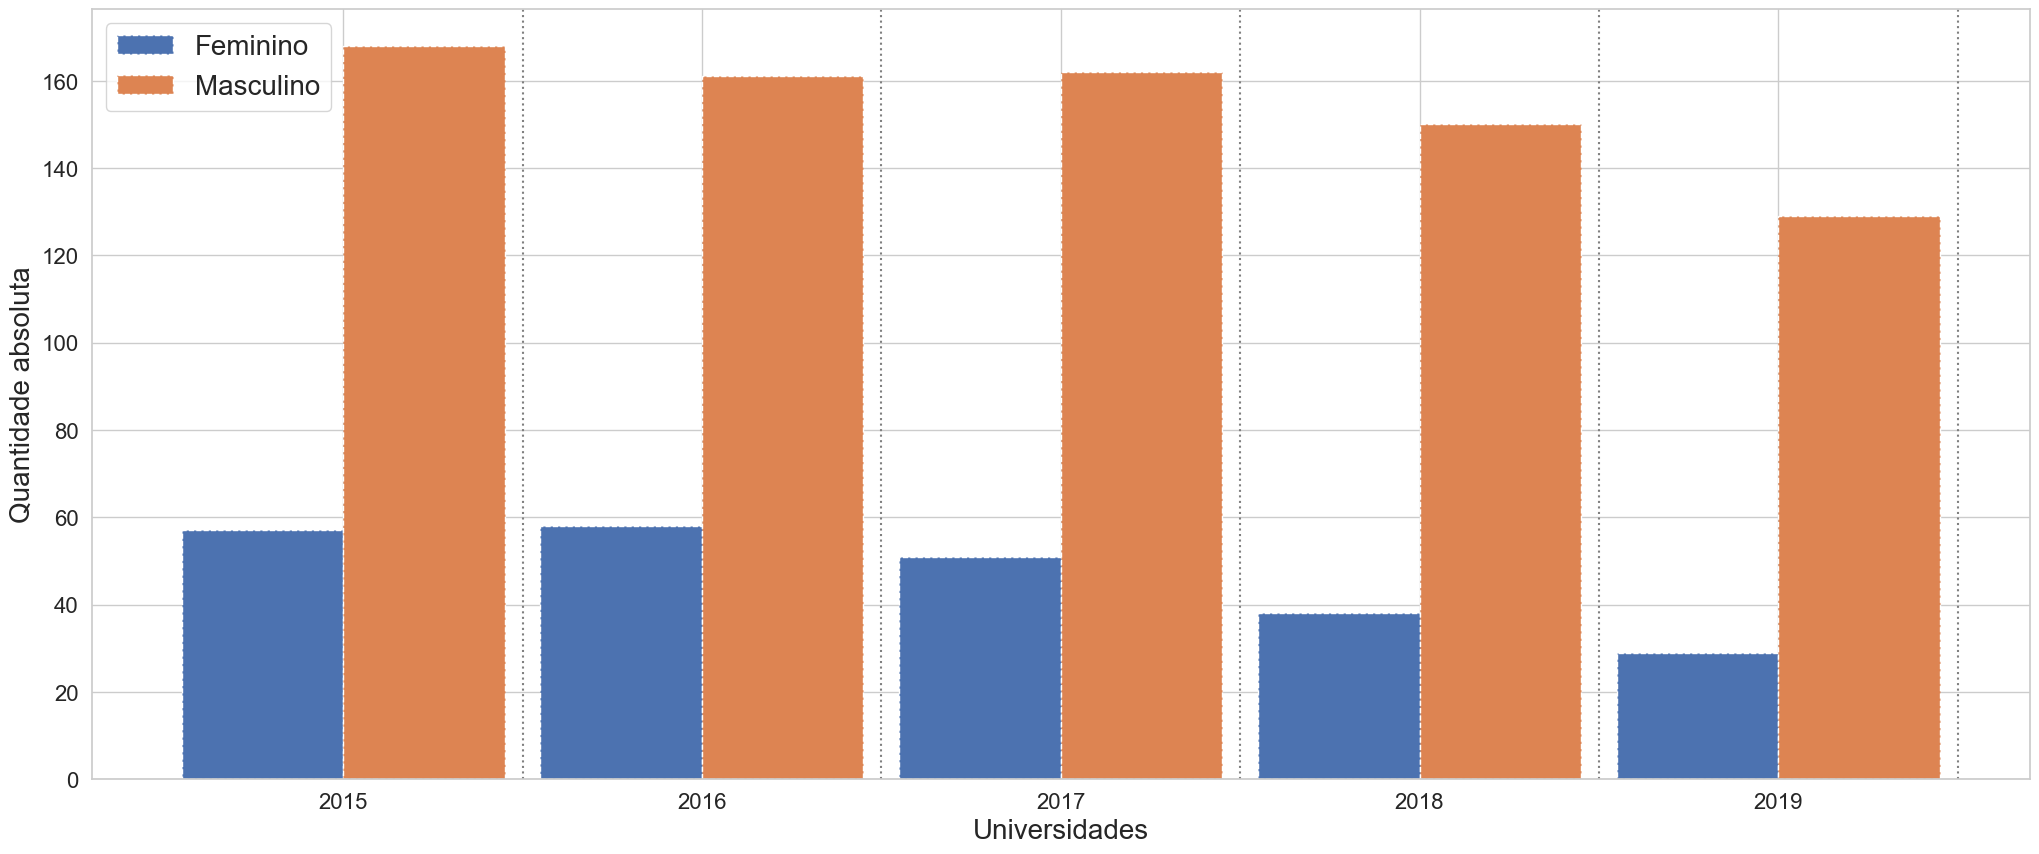

In [391]:
bar_plot_lines(df_docente, 'NU_ANO_CENSO', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

TP_SEXO       Feminino  Masculino
NU_ANO_CENSO                     
2015          5.682951  16.749751
2016          5.782652  16.051844
2017          5.084746  16.151545
2018          3.788634  14.955135
2019          2.891326  12.861416


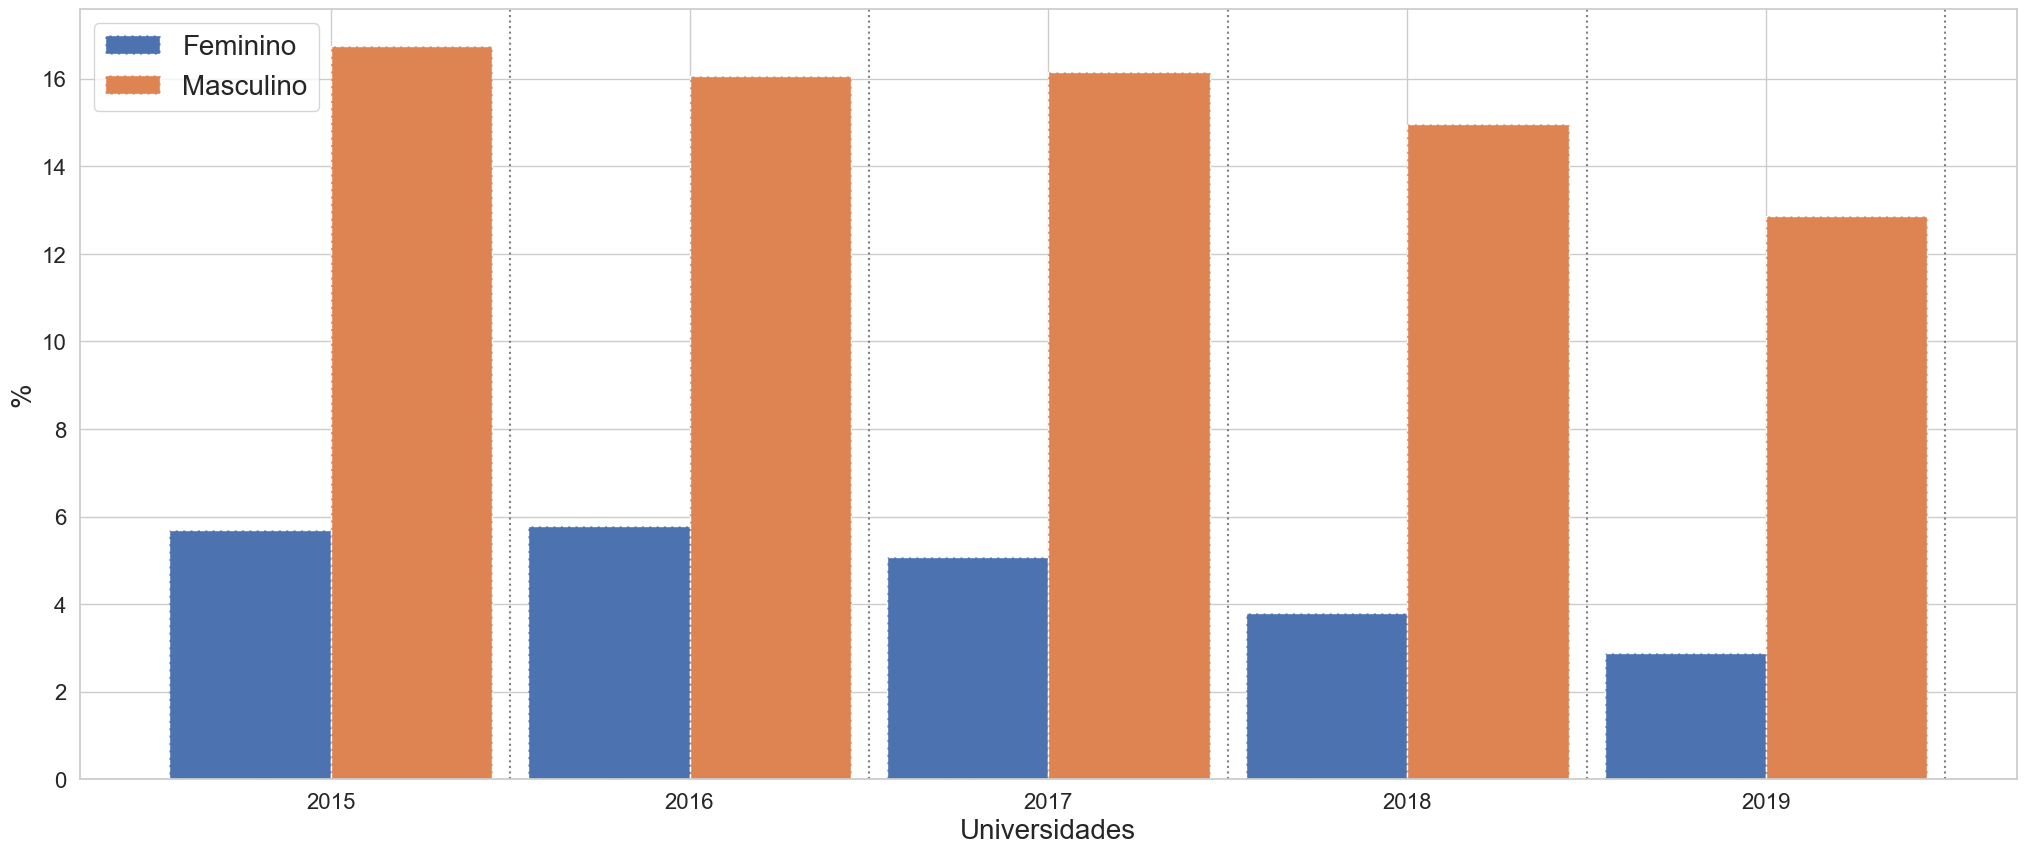

In [392]:
bar_plot_lines_porcentagem(df_docente, 'NU_ANO_CENSO', 'TP_SEXO', '%', 'Universidades') 

TP_SEXO       Feminino  Masculino
NU_ANO_CENSO                     
2015                57        168
2016                58        161
2017                51        162
2018                38        150
2019                29        129
[225, 219, 213, 188, 158] [233, 770]
TP_SEXO        Feminino  Masculino
NU_ANO_CENSO                      
2015          25.333333  74.666667
2016          26.484018  73.515982
2017          23.943662  76.056338
2018          20.212766  79.787234
2019          18.354430  81.645570


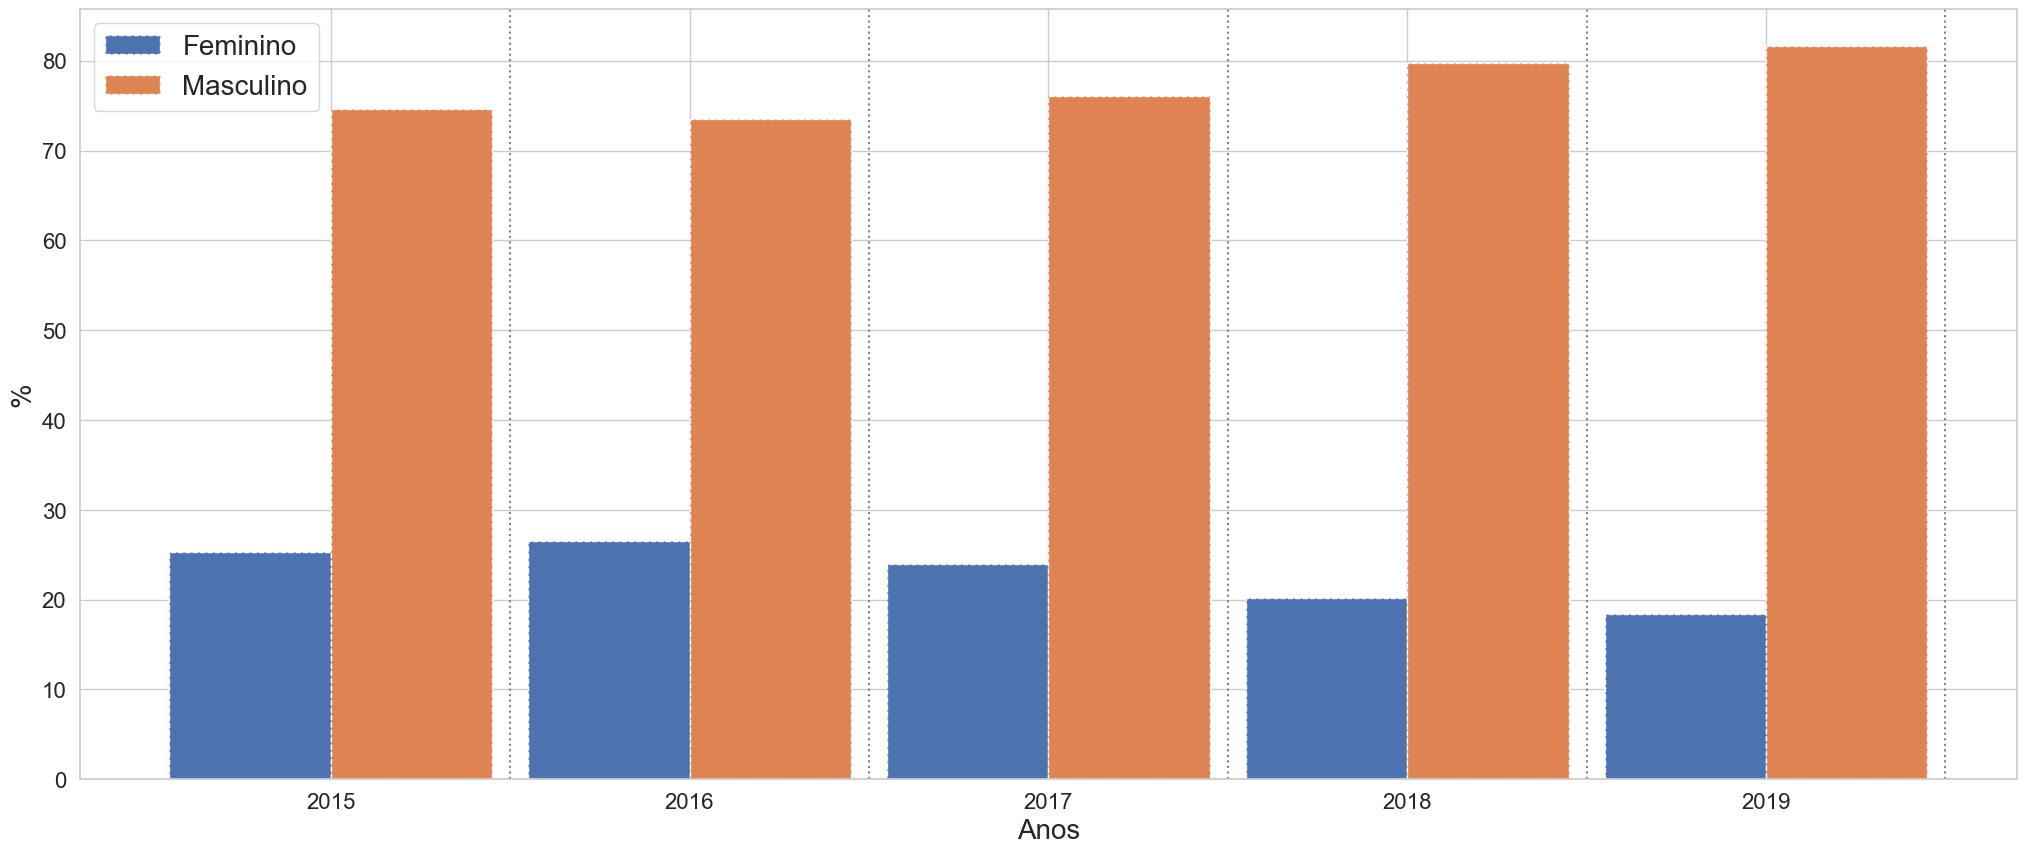

In [393]:
df = df_docente[['NU_ANO_CENSO', 'TP_SEXO']]
param1, param2 =['NU_ANO_CENSO', 'TP_SEXO']
param3, param4 = ['%', 'Anos']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
    # data_modified[data_modified.columns[i]] = 100*(data_modified[data_modified.columns[i]] / sum(totais))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

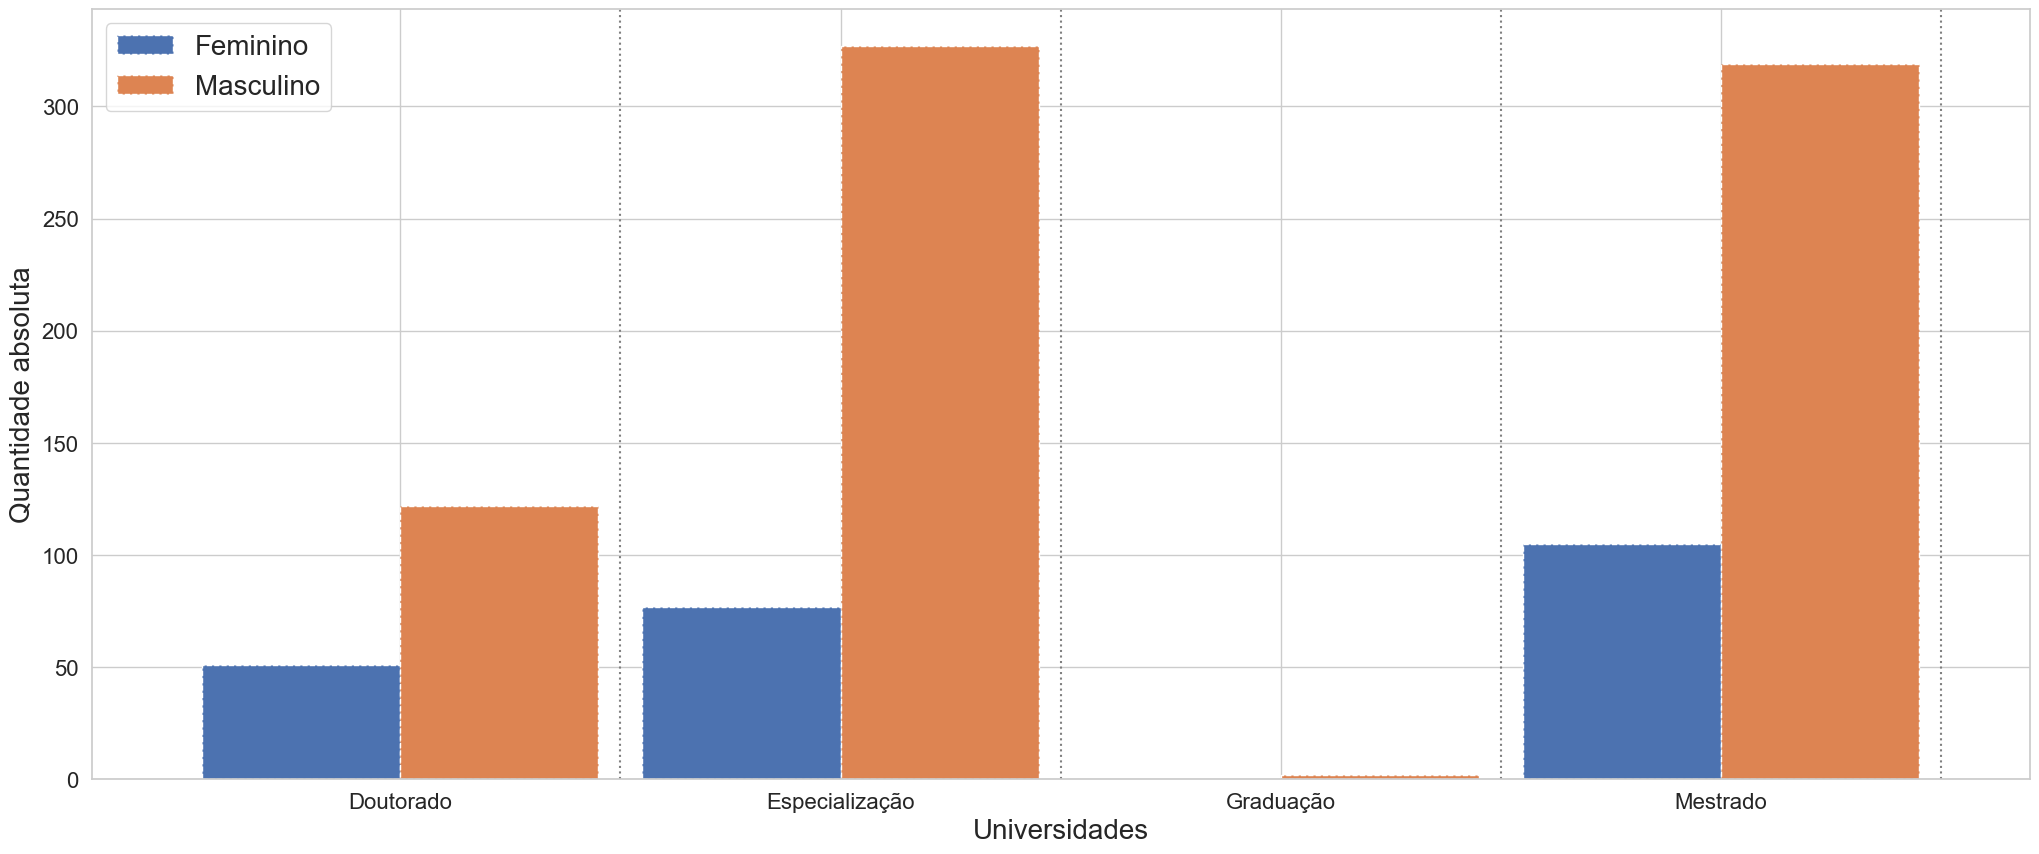

In [394]:
bar_plot_lines(df_docente, 'TP_ESCOLARIDADE', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

TP_SEXO          Feminino  Masculino
TP_ESCOLARIDADE                     
Doutorado            51.0      122.0
Especialização       77.0      327.0
Graduação             NaN        2.0
Mestrado            105.0      319.0
[173.0, 404.0, nan, 424.0] [233.0, 770.0]
TP_SEXO           Feminino  Masculino
TP_ESCOLARIDADE                      
Doutorado        29.479769  70.520231
Especialização   19.059406  80.940594
Graduação              NaN        NaN
Mestrado         24.764151  75.235849


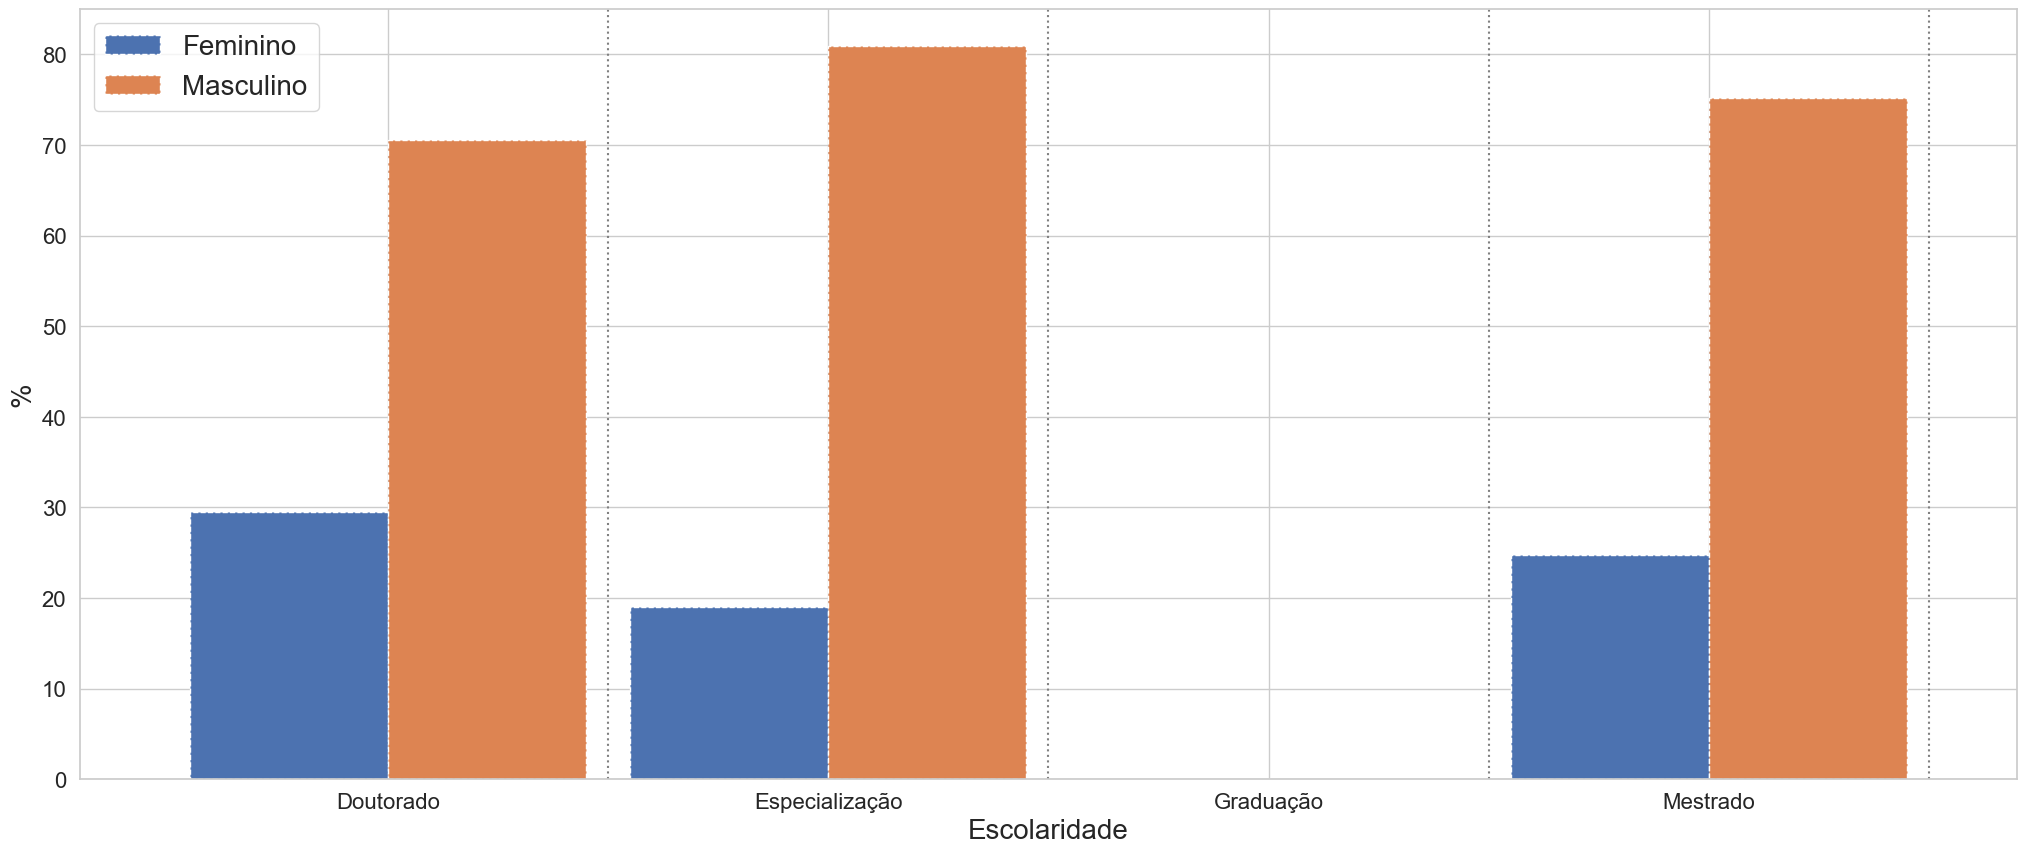

In [395]:
df = df_docente[['TP_ESCOLARIDADE', 'TP_SEXO']]
param1, param2 =['TP_ESCOLARIDADE', 'TP_SEXO']
param3, param4 = ['%', 'Escolaridade']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
    # data_modified[data_modified.columns[i]] = 100*(data_modified[data_modified.columns[i]] / sum(totais))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

TP_SEXO          Feminino  Masculino
TP_ESCOLARIDADE                     
Doutorado            51.0      122.0
Especialização       77.0      327.0
Graduação             NaN        2.0
Mestrado            105.0      319.0
[173.0, 404.0, nan, 424.0] [233.0, 770.0]
TP_SEXO           Feminino  Masculino
TP_ESCOLARIDADE                      
Doutorado        21.888412  15.844156
Especialização   33.047210  42.467532
Graduação              NaN   0.259740
Mestrado         45.064378  41.428571


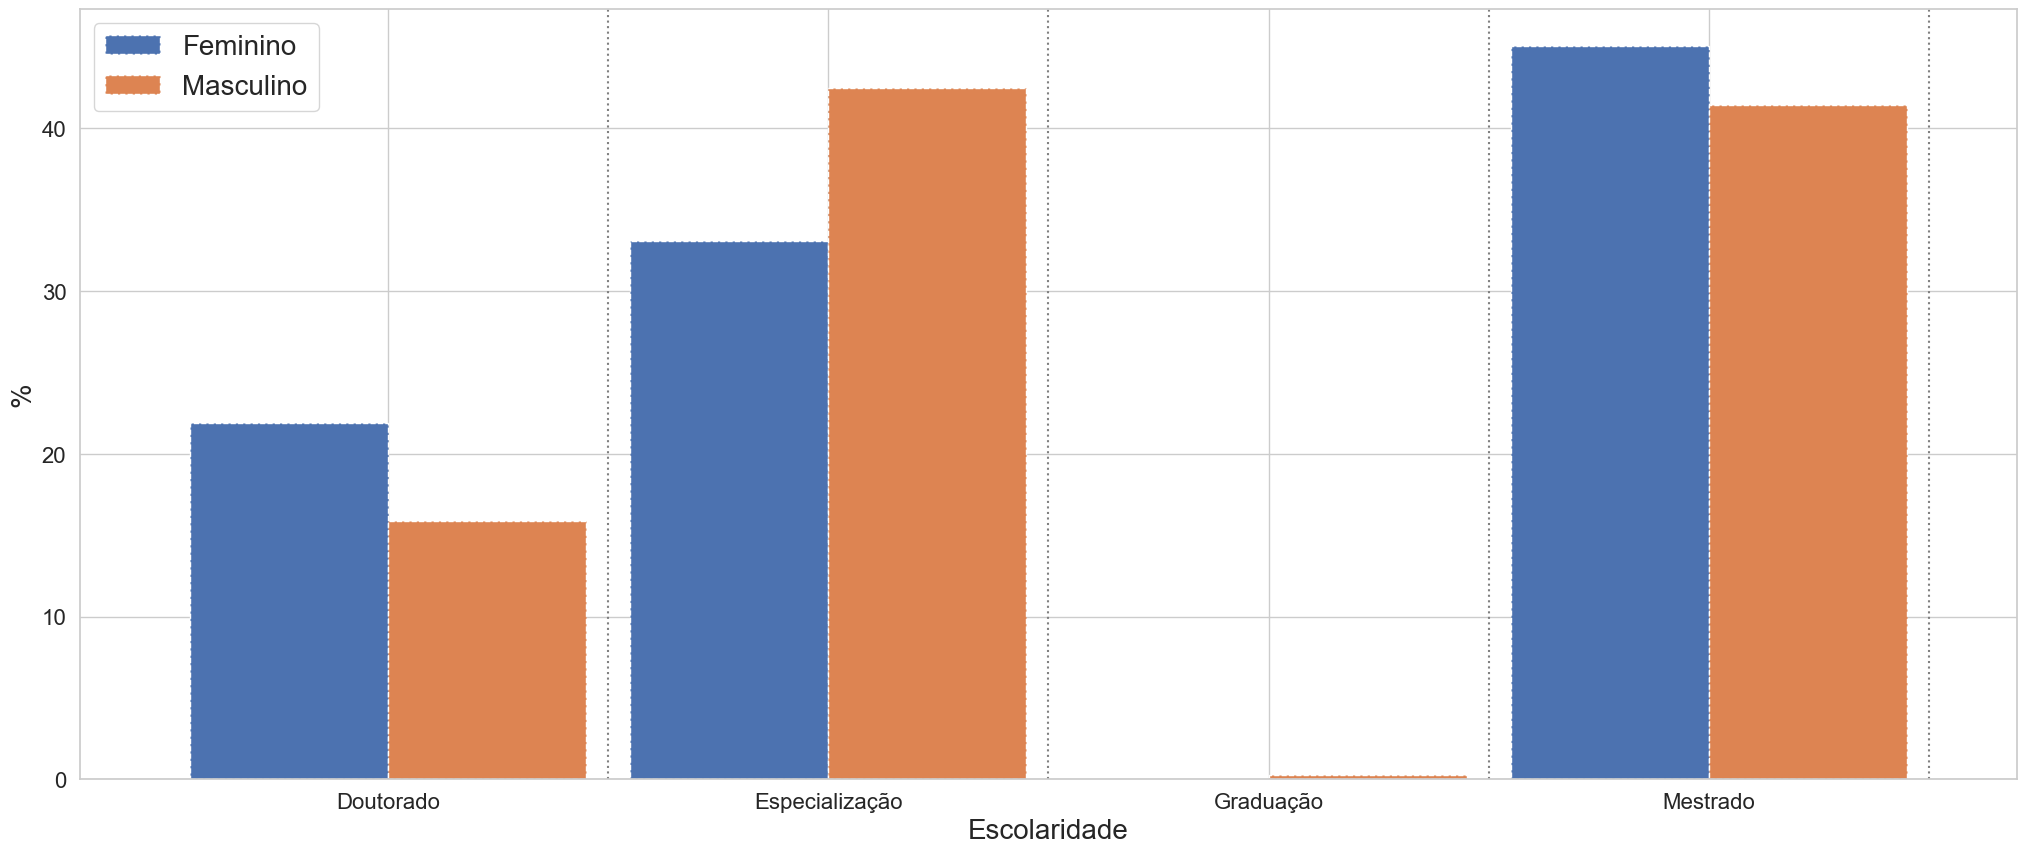

In [396]:
df = df_docente[['TP_ESCOLARIDADE', 'TP_SEXO']]
param1, param2 =['TP_ESCOLARIDADE', 'TP_SEXO']
param3, param4 = ['%', 'Escolaridade']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
# for enum,index in enumerate(data_modified.index):
#     data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
for enum,column in enumerate(data_modified.columns):
    data_modified[column] = 100*(data_modified[column] / (totais[enum]))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

TP_ESCOLARIDADE  Doutorado  Especialização  Graduação  Mestrado
TP_SEXO                                                        
Feminino              51.0            77.0        0.0     105.0
Masculino            122.0           327.0        2.0     319.0
Doutorado
Especialização
Graduação
Mestrado
[ 51.  77.   0. 105.]
[122. 327.   2. 319.]
[233.0, 770.0] [173.0, 404.0, 2.0, 424.0]
TP_ESCOLARIDADE  Doutorado  Especialização  Graduação   Mestrado
TP_SEXO                                                         
Feminino         21.888412       33.047210    0.00000  45.064378
Masculino        15.844156       42.467532    0.25974  41.428571


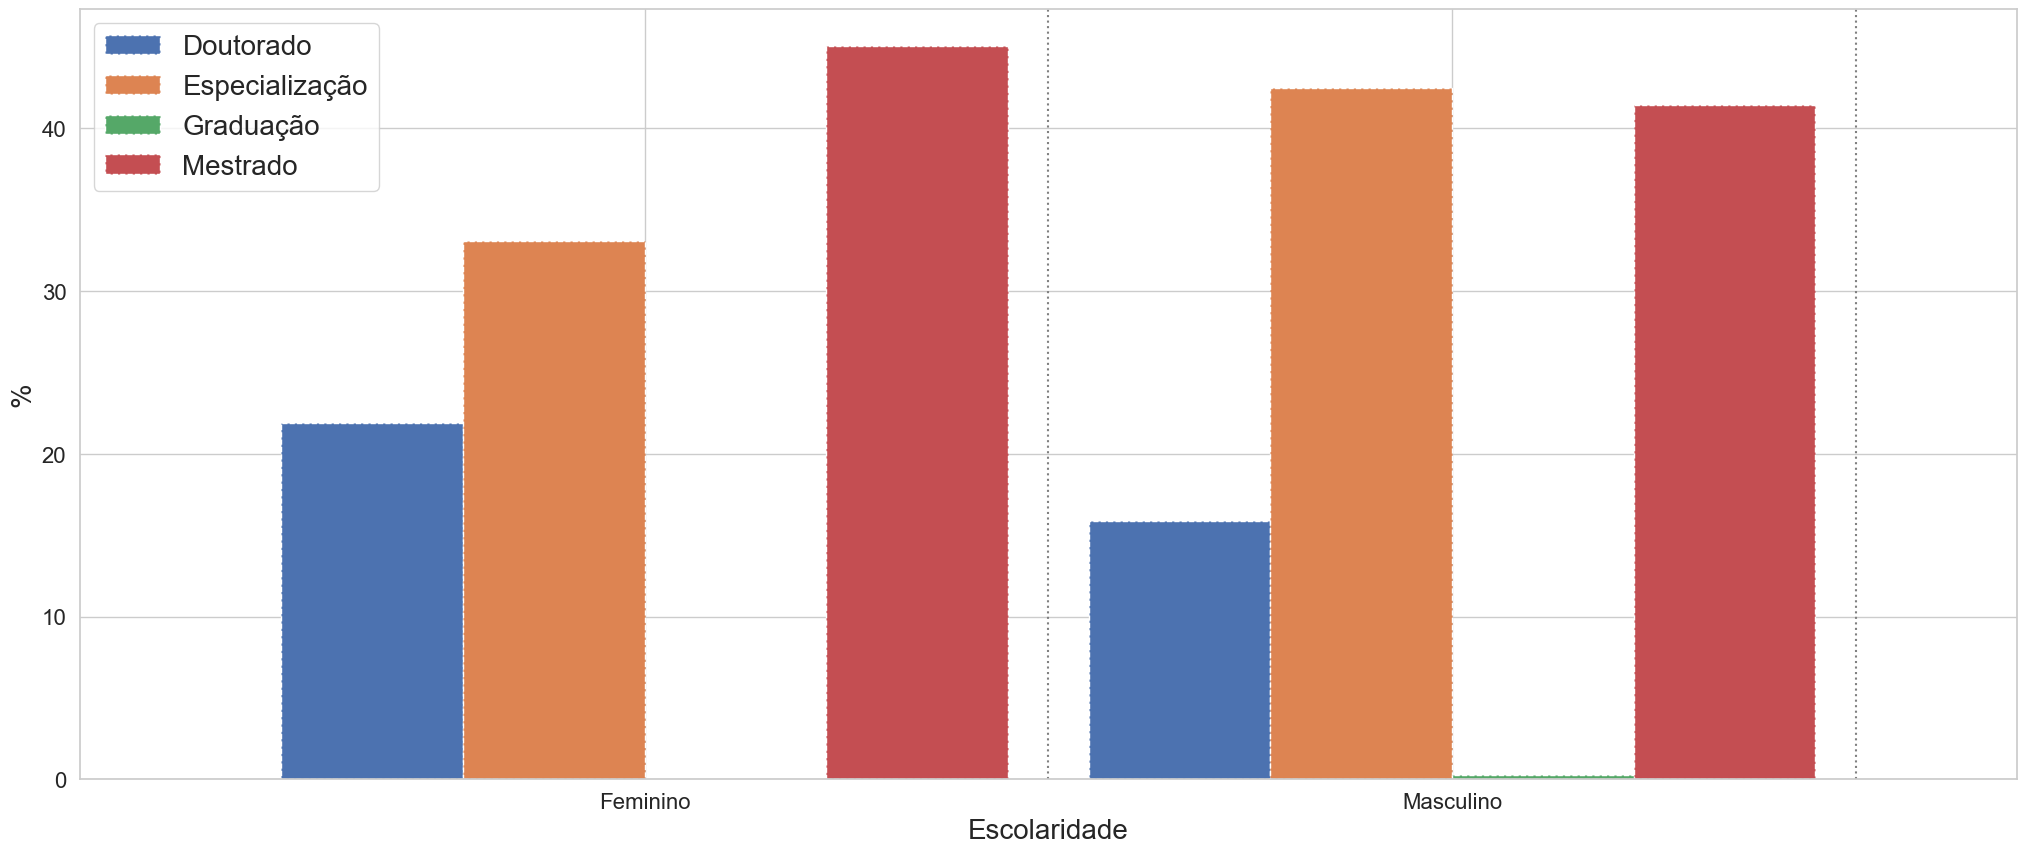

In [397]:
df = df_docente[['TP_SEXO', 'TP_ESCOLARIDADE']]
param1, param2 =['TP_SEXO', 'TP_ESCOLARIDADE']
param3, param4 = ['%', 'Escolaridade']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified.fillna(0, inplace=True)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    print(c)
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    print(c)
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
# for enum,column in enumerate(data_modified.columns):
#     data_modified[column] = 100*(data_modified[column] / (totais[enum]))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

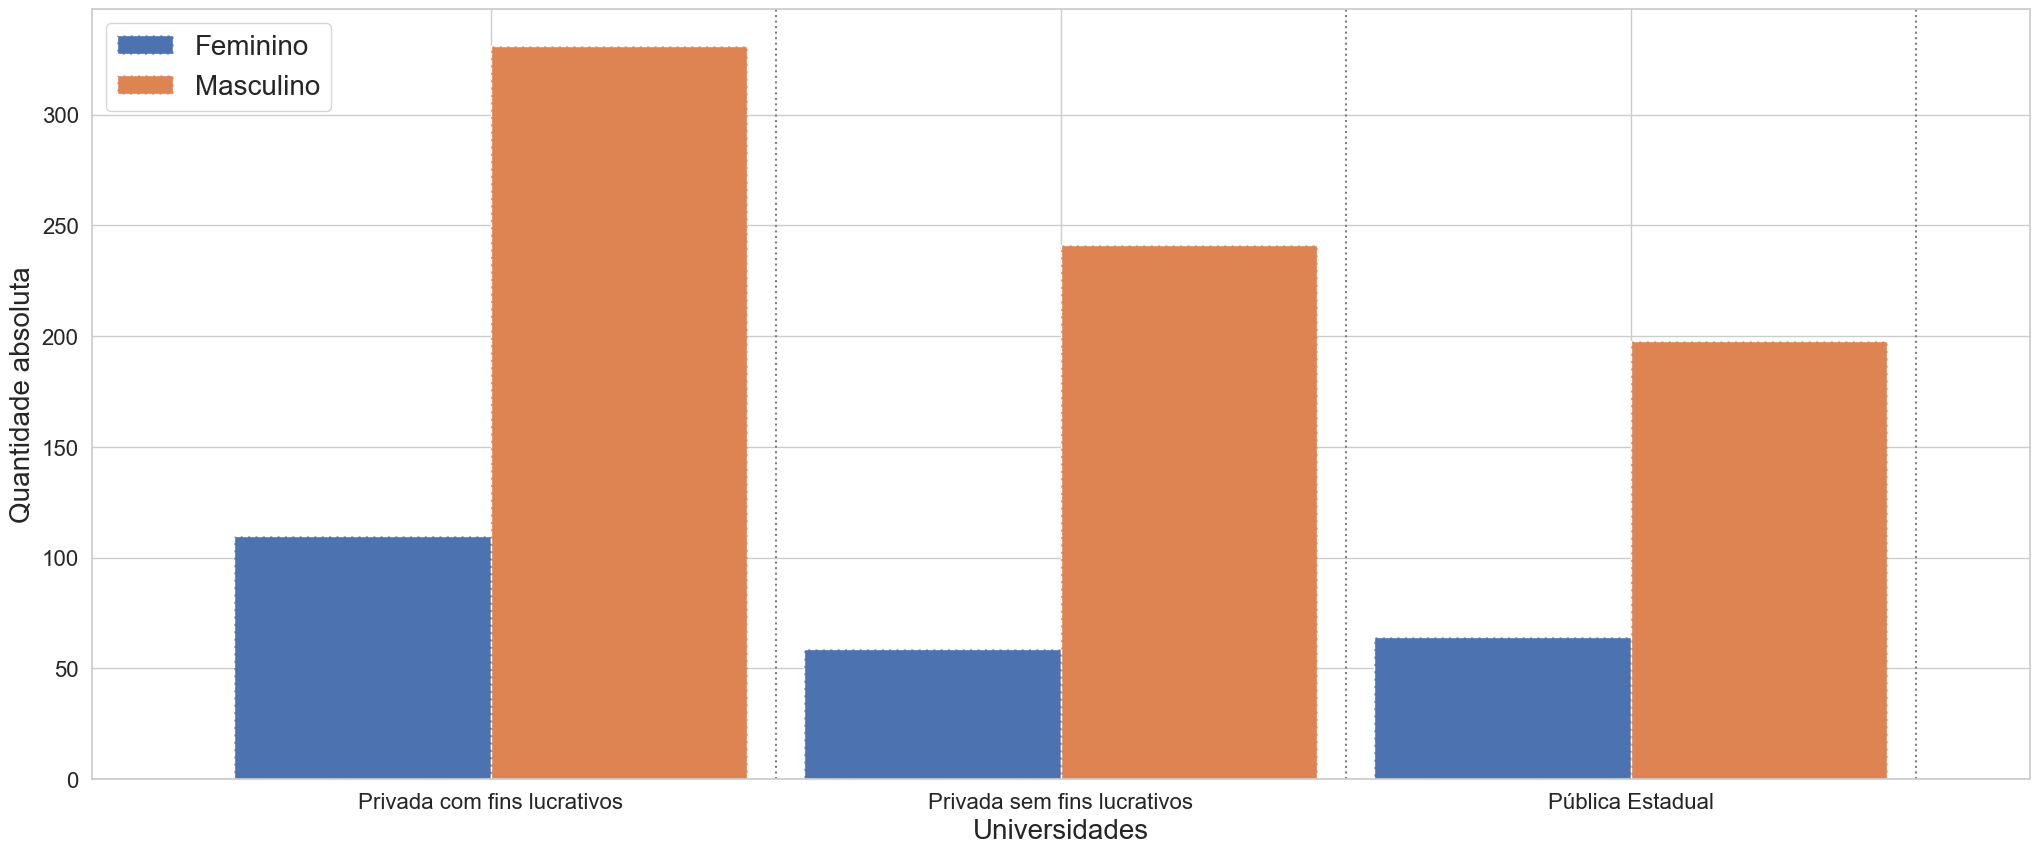

In [398]:
bar_plot_lines(df_docente, 'TP_CATEGORIA_ADMINISTRATIVA', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

TP_SEXO                      Feminino  Masculino
TP_CATEGORIA_ADMINISTRATIVA                     
Privada com fins lucrativos       110        331
Privada sem fins lucrativos        59        241
Pública Estadual                   64        198
[441, 300, 262] [233, 770]
TP_SEXO                       Feminino  Masculino
TP_CATEGORIA_ADMINISTRATIVA                      
Privada com fins lucrativos  24.943311  75.056689
Privada sem fins lucrativos  19.666667  80.333333
Pública Estadual             24.427481  75.572519


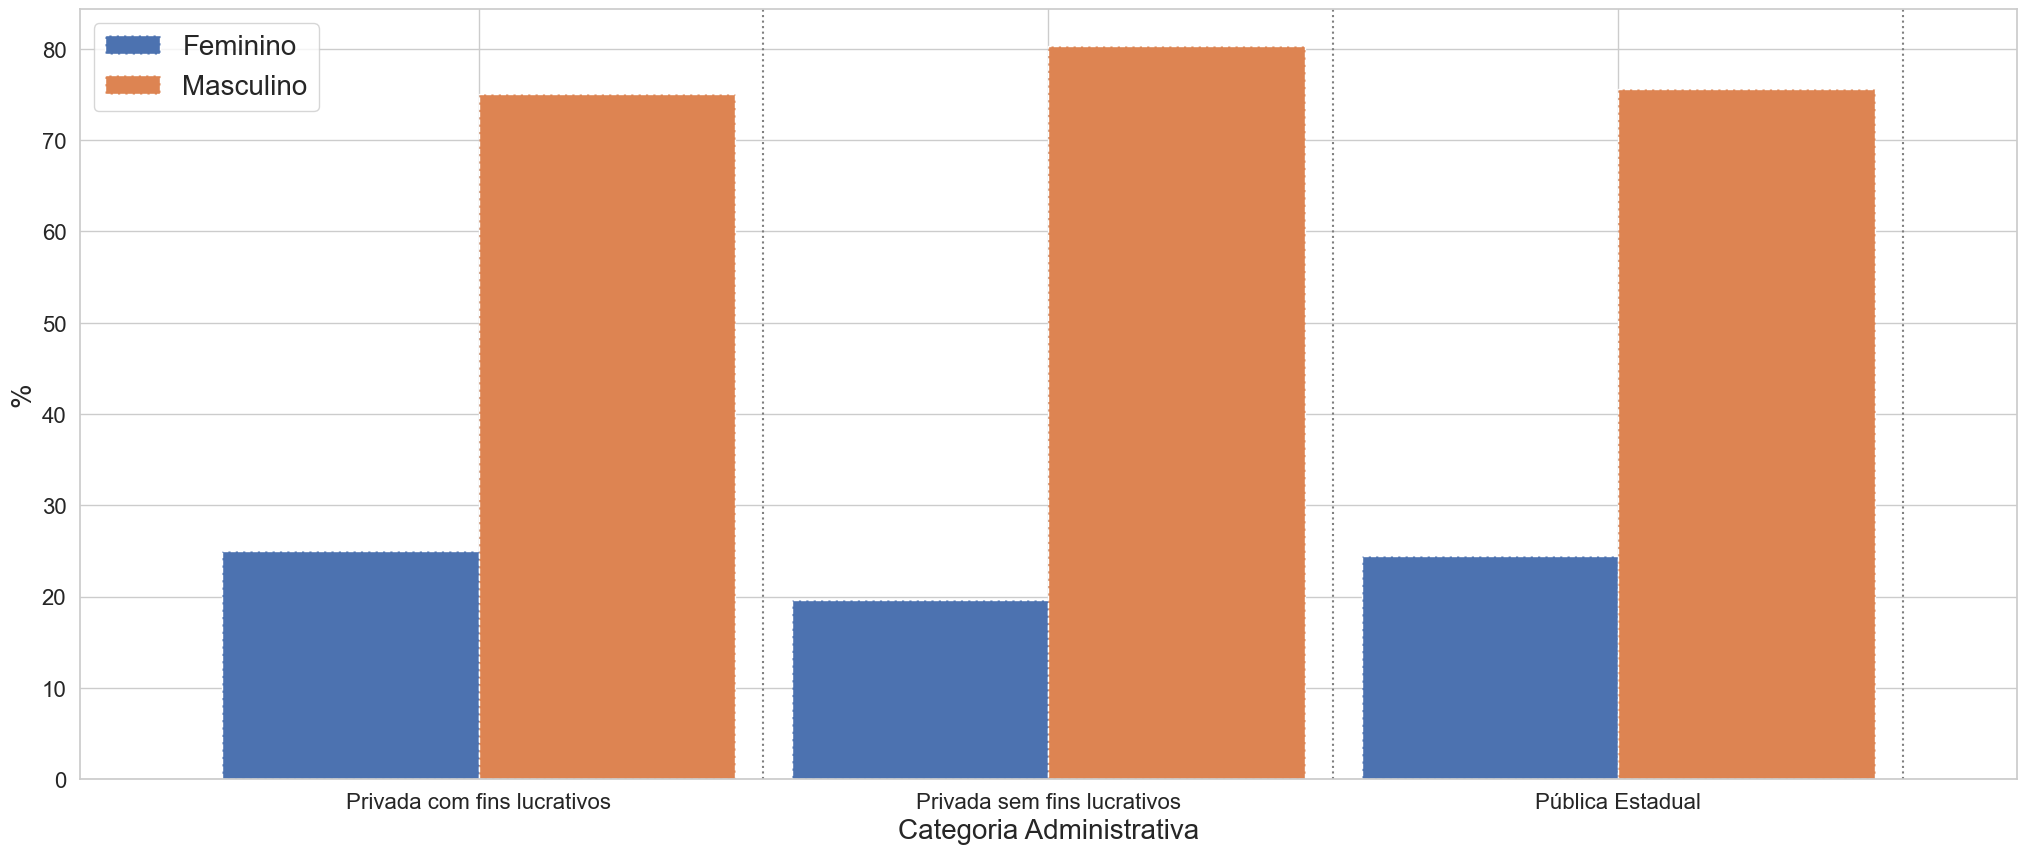

In [399]:
df = df_docente[['TP_CATEGORIA_ADMINISTRATIVA', 'TP_SEXO']]
param1, param2 =['TP_CATEGORIA_ADMINISTRATIVA', 'TP_SEXO']
param3, param4 = ['%', 'Categoria Administrativa']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
    # data_modified[data_modified.columns[i]] = 100*(data_modified[data_modified.columns[i]] / sum(totais))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

TP_CATEGORIA_ADMINISTRATIVA  Privada com fins lucrativos  \
TP_SEXO                                                    
Feminino                                             110   
Masculino                                            331   

TP_CATEGORIA_ADMINISTRATIVA  Privada sem fins lucrativos  Pública Estadual  
TP_SEXO                                                                     
Feminino                                              59                64  
Masculino                                            241               198  
[233, 770] [441, 300, 262]
TP_CATEGORIA_ADMINISTRATIVA  Privada com fins lucrativos  \
TP_SEXO                                                    
Feminino                                       47.210300   
Masculino                                      42.987013   

TP_CATEGORIA_ADMINISTRATIVA  Privada sem fins lucrativos  Pública Estadual  
TP_SEXO                                                                     
Feminino                     

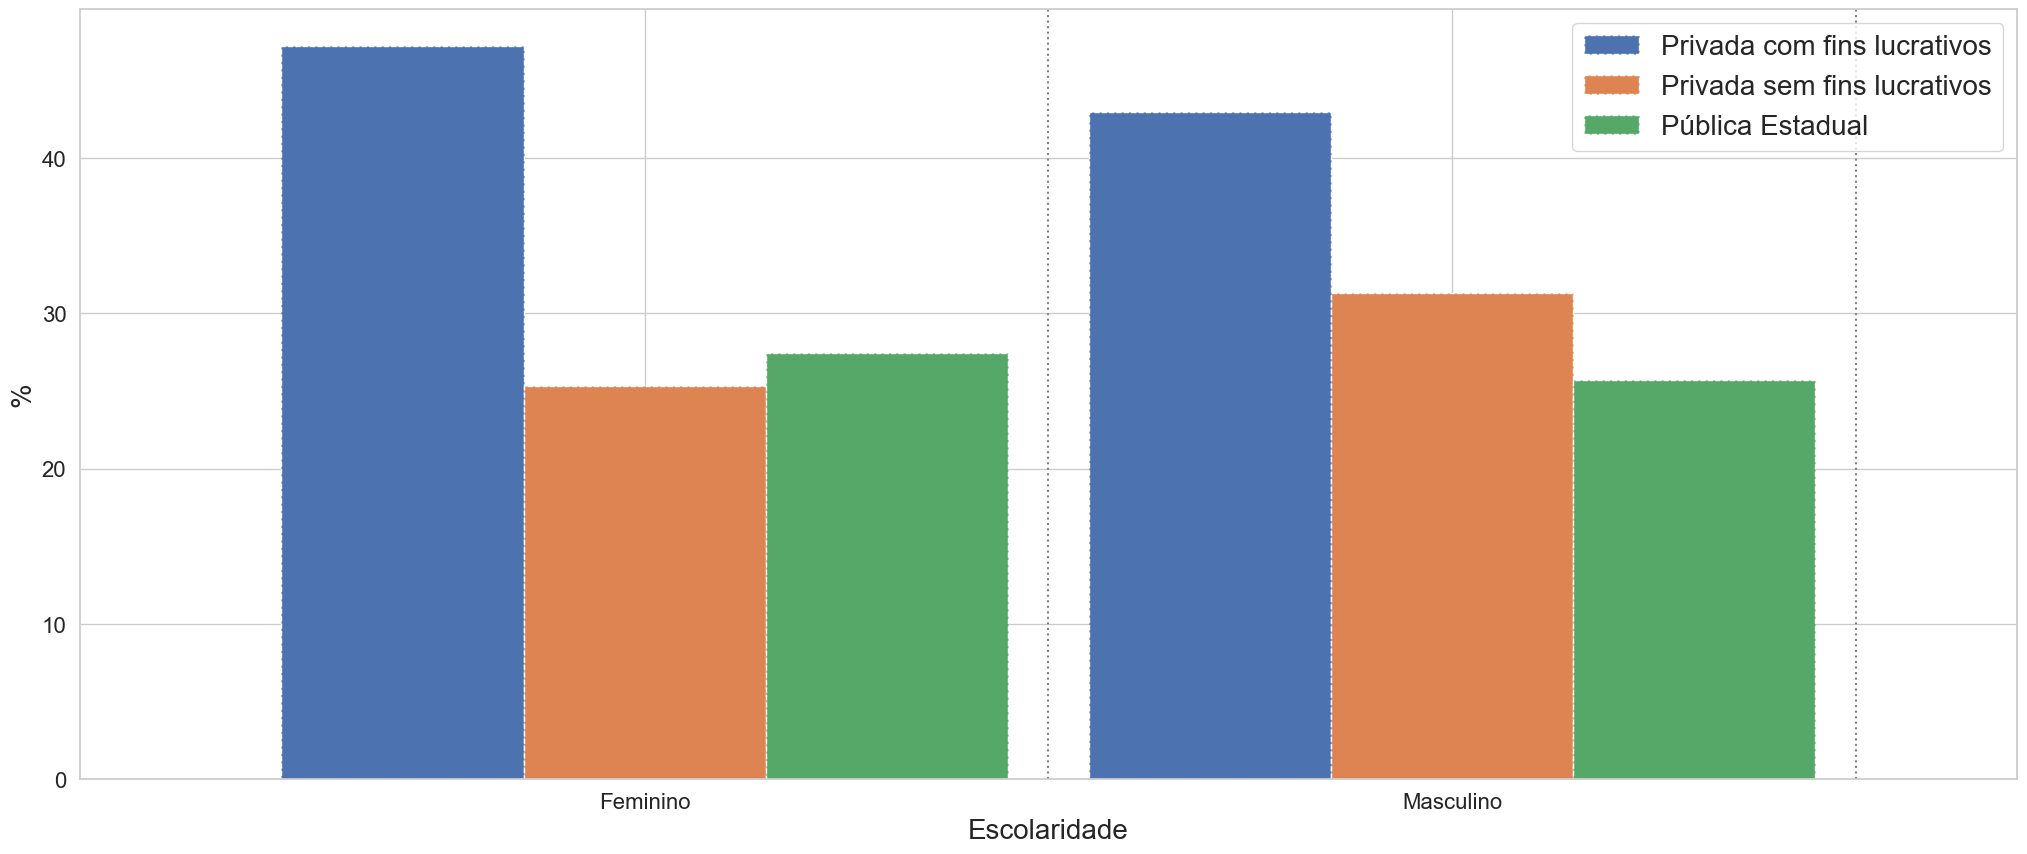

In [401]:
df = df_docente[['TP_SEXO', 'TP_CATEGORIA_ADMINISTRATIVA']]
param1, param2 =['TP_SEXO', 'TP_CATEGORIA_ADMINISTRATIVA']
param3, param4 = ['%', 'Escolaridade']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
data_modified.fillna(0, inplace=True)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
# for enum,column in enumerate(data_modified.columns):
#     data_modified[column] = 100*(data_modified[column] / (totais[enum]))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')

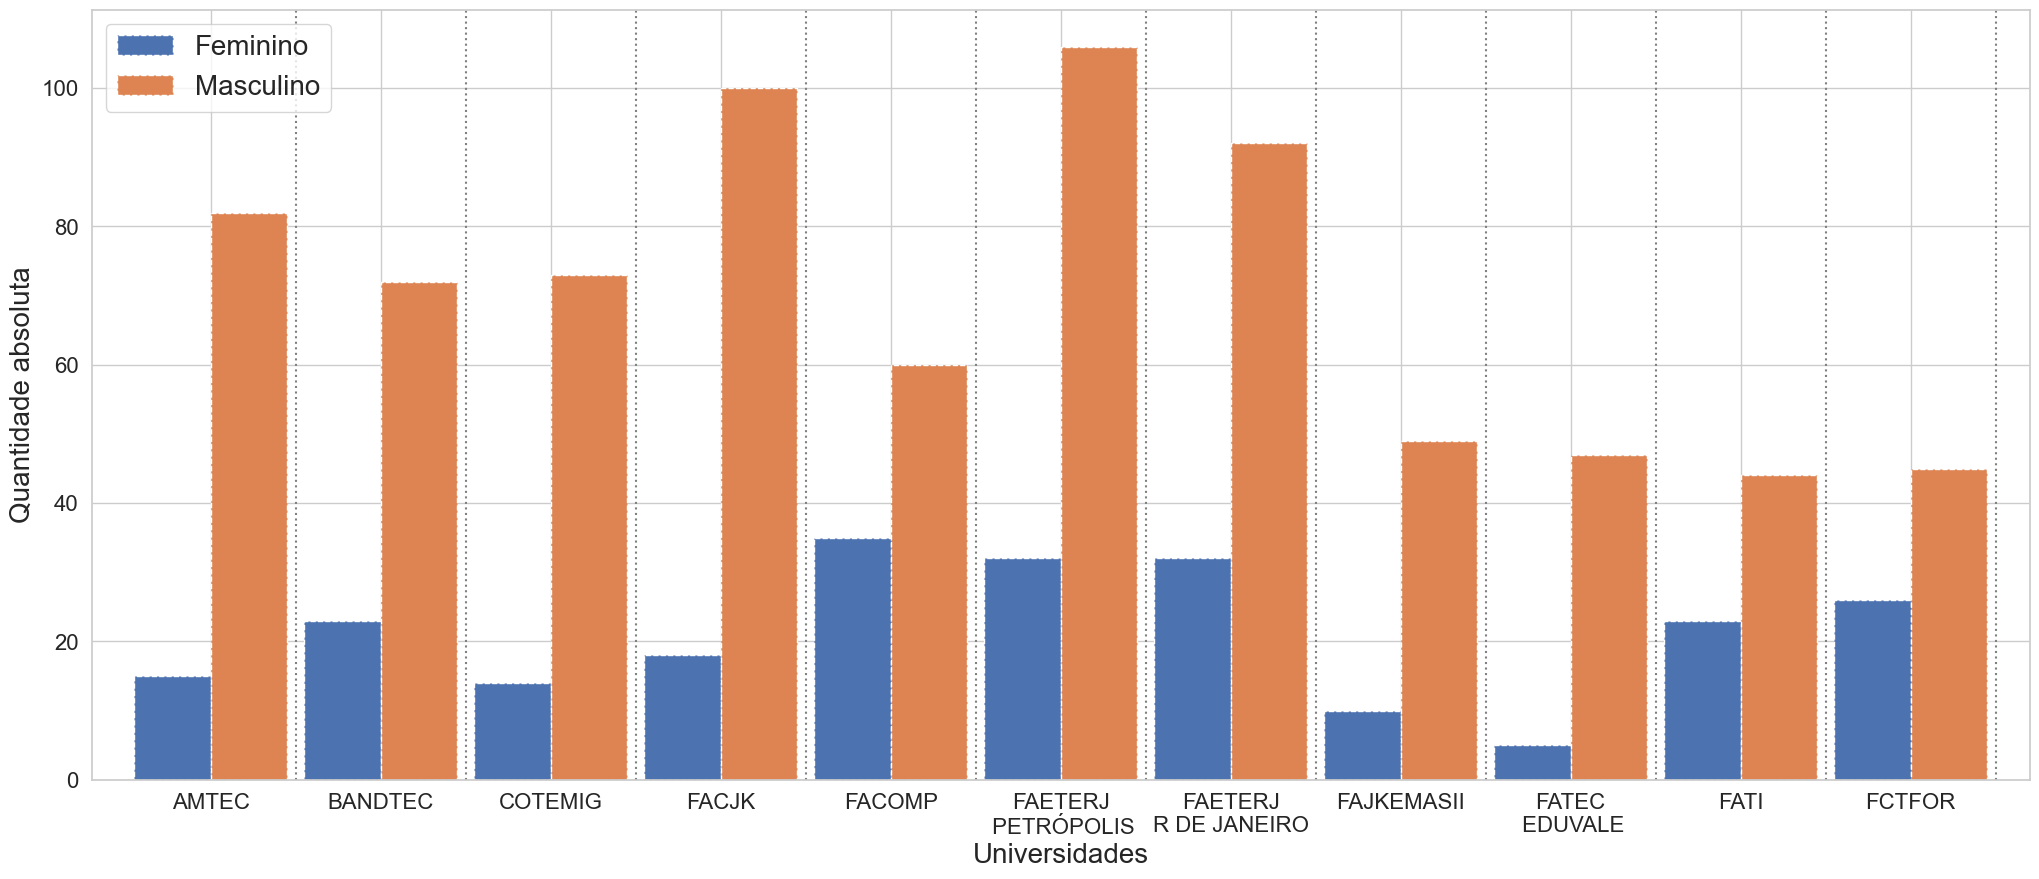

In [402]:
bar_plot_lines(df_docente, 'NO_IES', 'TP_SEXO', 'Quantidade absoluta', 'Universidades')

TP_SEXO                Feminino  Masculino
NO_IES                                    
AMTEC                        15         82
BANDTEC                      23         72
COTEMIG                      14         73
FACJK                        18        100
FACOMP                       35         60
FAETERJ\n PETRÓPOLIS         32        106
FAETERJ\nR DE JANEIRO        32         92
FAJKEMASII                   10         49
FATEC\n EDUVALE               5         47
FATI                         23         44
FCTFOR                       26         45
[97, 95, 87, 118, 95, 138, 124, 59, 52, 67, 71] [233, 770]
TP_SEXO                 Feminino  Masculino
NO_IES                                     
AMTEC                  15.463918  84.536082
BANDTEC                24.210526  75.789474
COTEMIG                16.091954  83.908046
FACJK                  15.254237  84.745763
FACOMP                 36.842105  63.157895
FAETERJ\n PETRÓPOLIS   23.188406  76.811594
FAETERJ\nR DE JANEIRO  25.8064

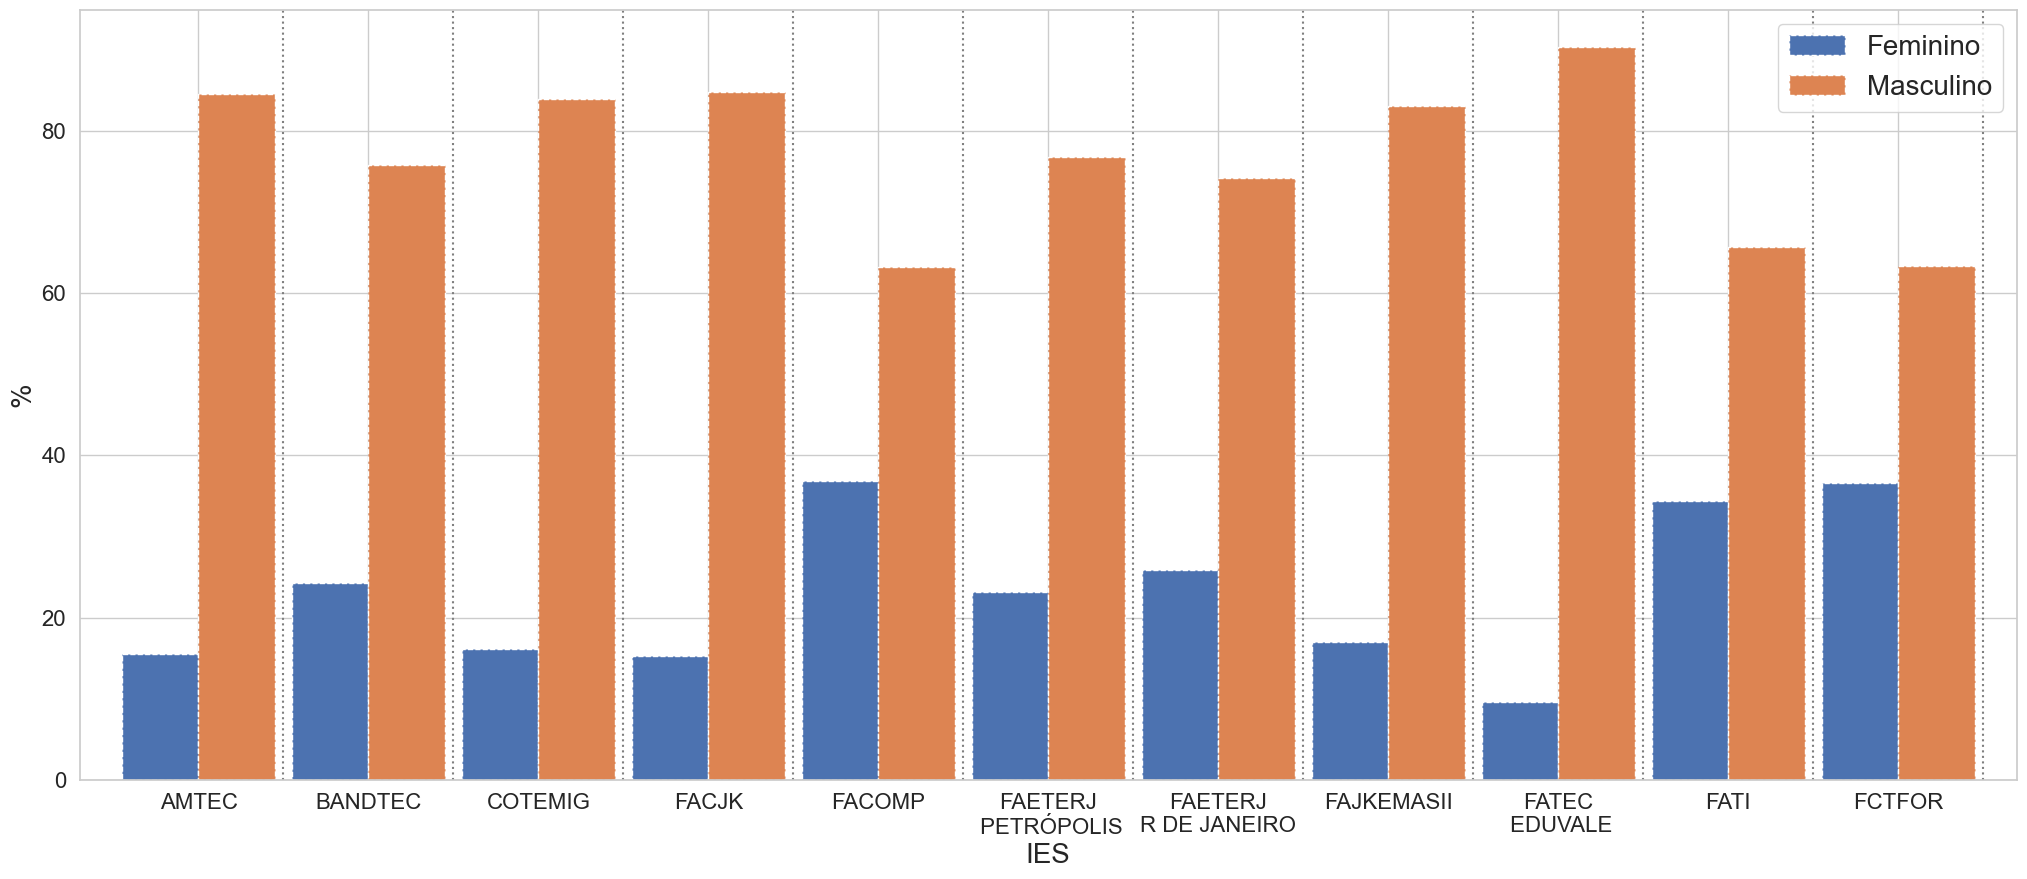

In [403]:
df = df_docente[['NO_IES', 'TP_SEXO']]
param1, param2 =['NO_IES', 'TP_SEXO']
param3, param4 = ['%', 'IES']
data = (df.set_index(df.columns.drop(param2,1).tolist())
      [param2]
      .reset_index()
      .rename(columns={0:param2})
      .loc[:, df.columns]
  )
data = data.replace(replace_map)
data_modified = data.groupby(param2)[param1].value_counts().unstack(0)
print(data_modified)
totais = []
totais_categoria = []
for c in data_modified.columns:
    totais.append(data_modified[c].sum())
for c in data_modified.values:
    totais_categoria.append(c.sum())
    
print(totais_categoria, totais)
for enum,index in enumerate(data_modified.index):
    data_modified.loc[[index]] = 100*(data_modified.loc[[index]] / totais_categoria[enum])
    # data_modified[data_modified.columns[i]] = 100*(data_modified[data_modified.columns[i]] / sum(totais))
# data_modified[data_modified.columns[i]] = data_modified[data_modified.columns[i]] / totais[i]
print(data_modified)
data_modified.plot.bar(rot=0, figsize=(25, 10), fontsize=16, width=0.9, linestyle="--") \
      .legend(prop={'size': 20})
      
plt.ylabel(param3, fontsize = 20)
plt.xlabel(param4, fontsize = 20)

xposition = [0.5 + i for i in range(len(df[param1].unique()))]
for xc in xposition:
    plt.axvline(x=xc, color='gray', linestyle=':')